### Linear Regression Assignment - Boom Bike Sharing
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Problem Statement -
 BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Business Goal -
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


# Reading and Understanding the Data


In [18]:
# Importing Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from sklearn.metrics import r2_score 

import warnings
warnings.filterwarnings('ignore')


In [19]:
# Importing csv file 
df = pd.read_csv("./day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# checking for number of rows and columns
df.shape

(730, 16)

In [21]:
# Checking datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [22]:
# Summary of numerical variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [23]:
# Renaming columns to meaningful names
df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
# checking for missing values
df.isnull().sum()


instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- No Missing values in any column in dataset

In [25]:
#Checking for uniques values count
df.nunique().sort_values()
df["weekday"].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [26]:
# Mapping variables season , month , weathersit and weekday to categorical variable to make proper analysis

df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })


df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})


# 6 -> Mon Found by 01-01-2018 calender day
df['weekday']=df.weekday.map({0:'sun', 1:'mon', 2:'tue',3:'wed',4:'thr',5:'fri',6:'sat'})

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Visualisation

Visualising Numeric Variables


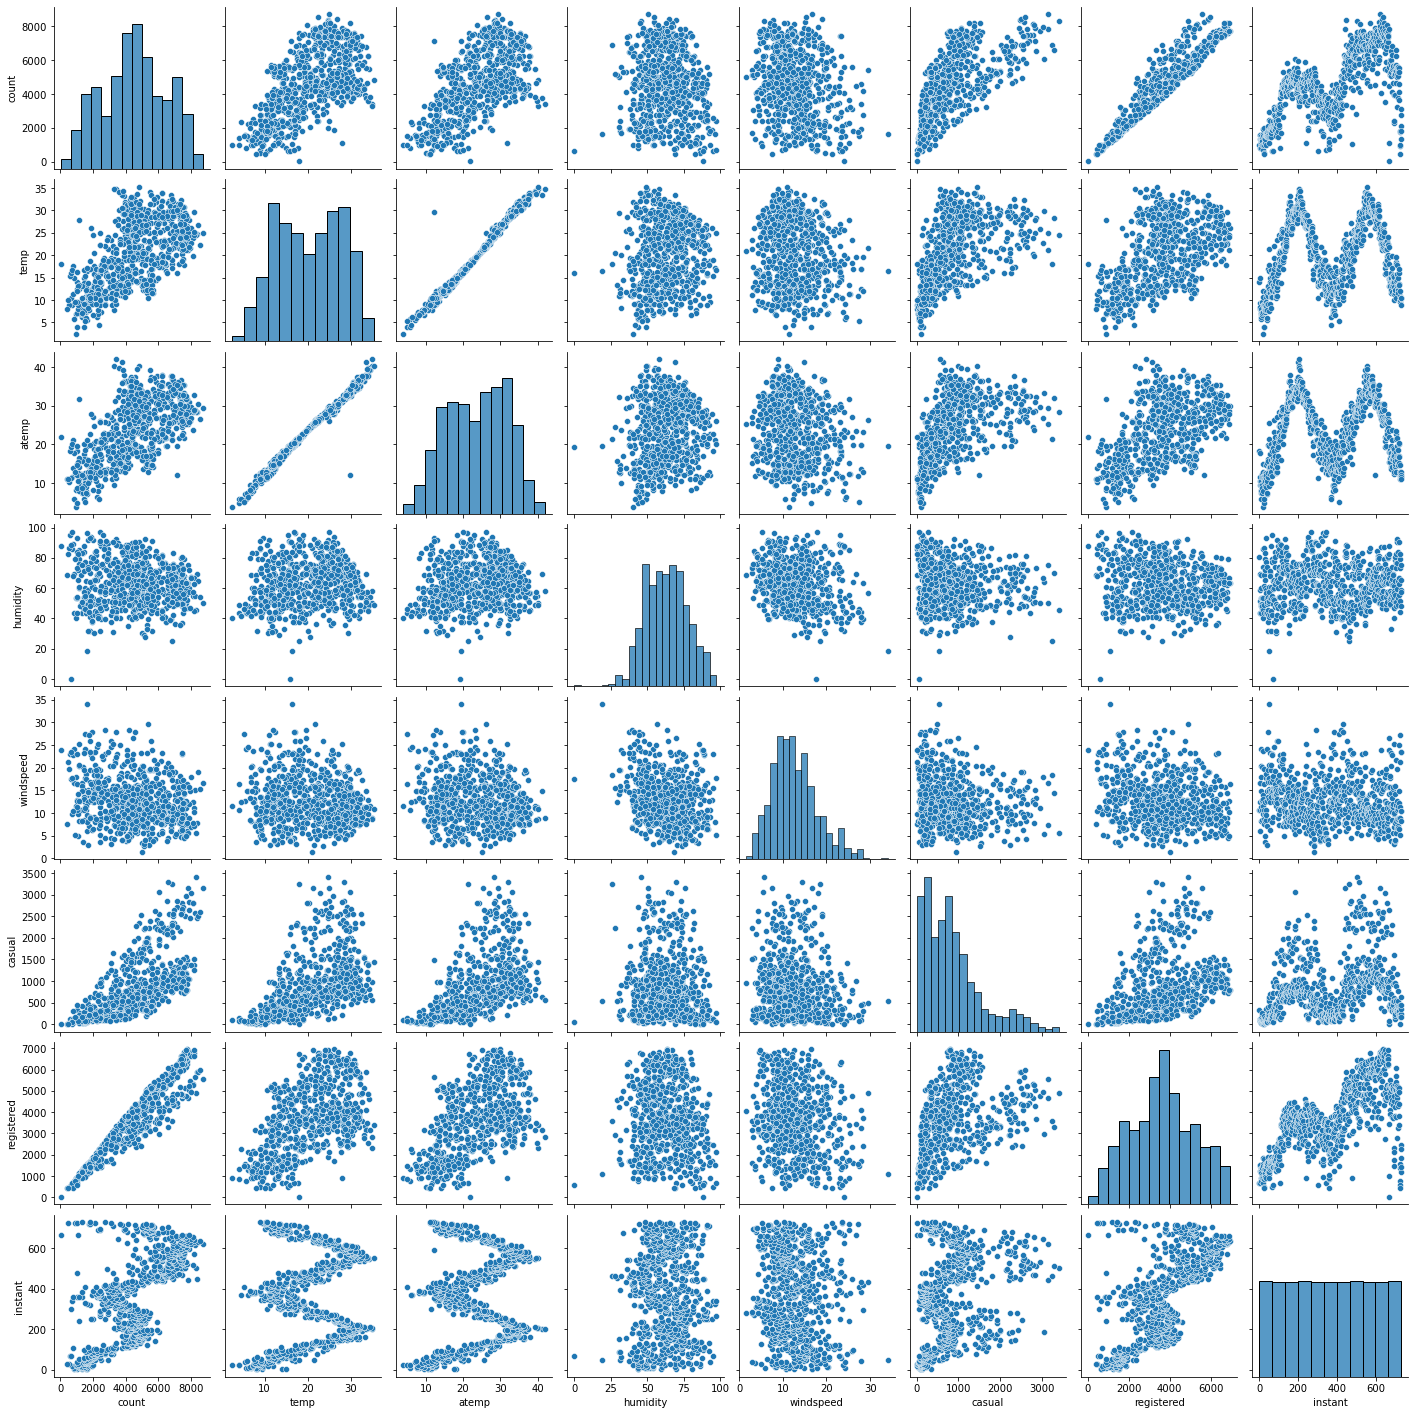

In [27]:
sns.pairplot(df, vars=["count","temp","atemp","humidity","windspeed","casual","registered","instant"])
plt.show()

### Visualising Categorical variable with target cariable count assigned on y-axis 

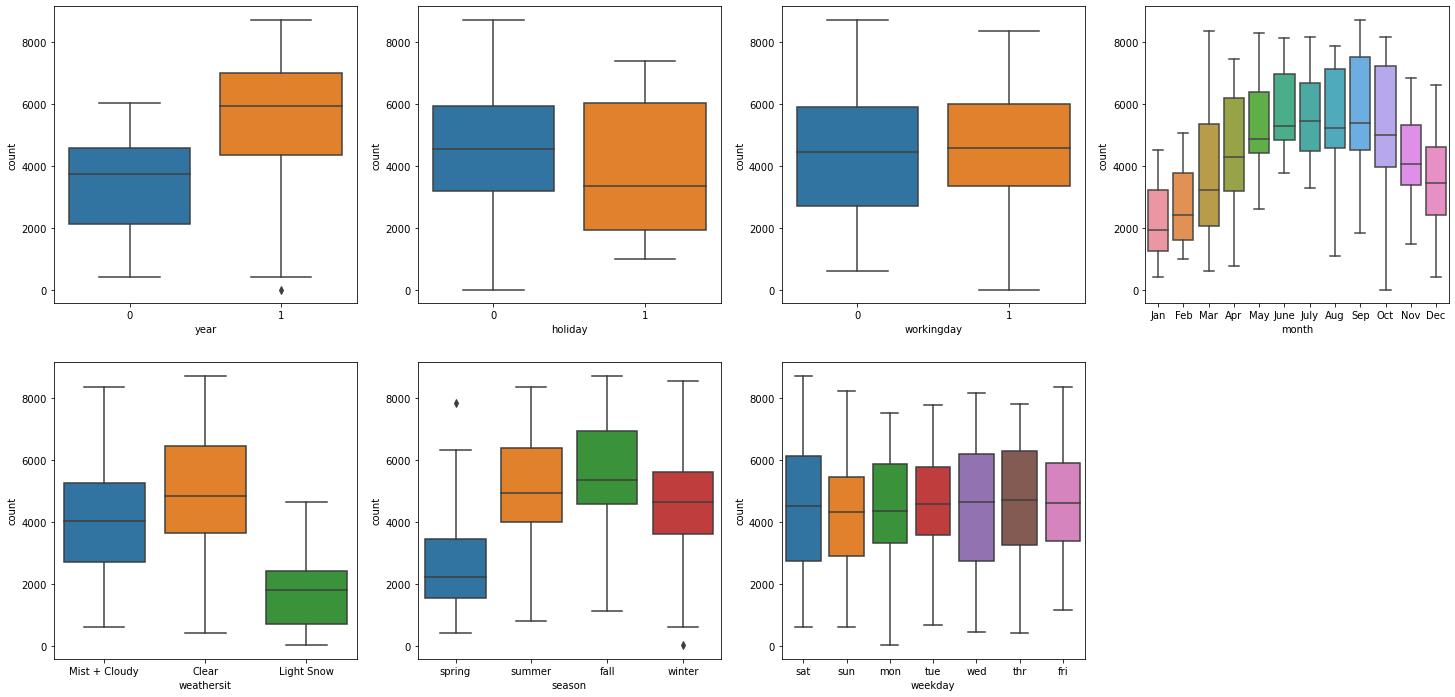

In [28]:
plt.figure(figsize=(25, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df)

plt.show()

## Univariate analysis

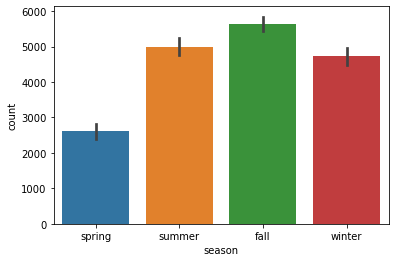

In [29]:
sns.barplot('season','count',data=df)
plt.show()

- Bike Rentals are more during the Fall season and then in summer


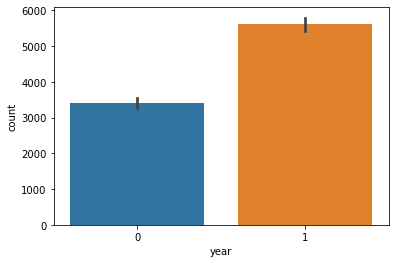

In [30]:
#Relation between Year and count of bike rentals
sns.barplot('year','count',data=df)
plt.show()

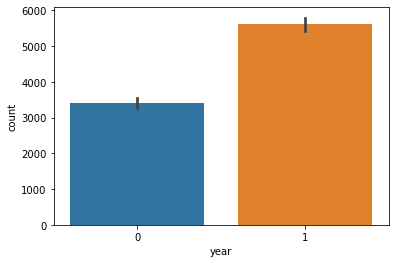

In [31]:
#Relation between Year and count of bike rentals
sns.barplot('year','count',data=df)
plt.show()

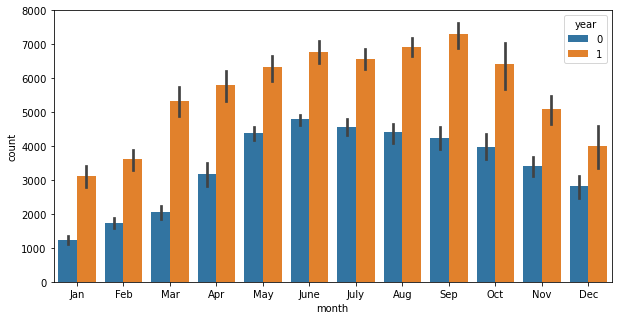

In [32]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=df)
plt.show()

- Bike Rentals are more in the year 2019 compared to 2018


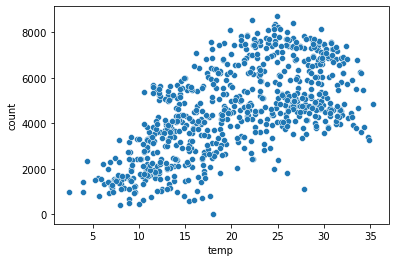

In [33]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=df)
plt.show()

### Analising the correlation between different variable with count

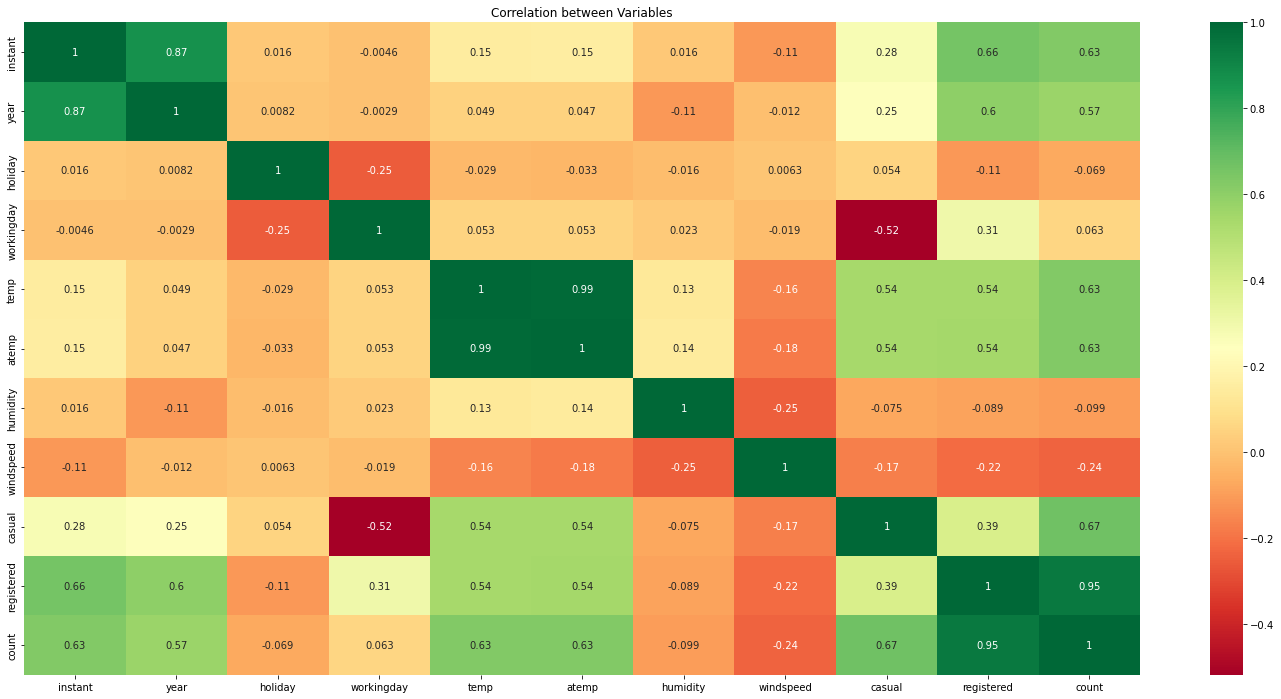

In [34]:

plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

### Observation
- instant ,temp , atemp , casual ,registered are more correlated with 'count' cariable
- From above plots we can determine the variables which can be useful in model building

In [35]:
# Dropping columns which are not required in analysis
df=df.drop(['instant','registered','casual','dteday','atemp'],axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


# Preparing Data for Model building

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [37]:
# Creating dummy variables for season ,month , weekday , weathersit category variables

seasons = pd.get_dummies(df.season,drop_first=True)
#seasons
months = pd.get_dummies(df.month,drop_first=True)
#months
weekdays = pd.get_dummies(df.weekday,drop_first=True)
#weekdays
weather = pd.get_dummies(df.weathersit,drop_first=True)
#weather
df.columns


Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [38]:
#Combining the dummy variables with main dataframe 
df = pd.concat([months,weekdays,seasons,weather,df],axis=1)
df.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [39]:
df.columns


Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thr', 'tue', 'wed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy', 'season', 'year', 'month',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [40]:
#droping original columns of dummy variables
df = df.drop(['season','month','weekday','weathersit'], axis = 1)
df.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thr', 'tue', 'wed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy', 'year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

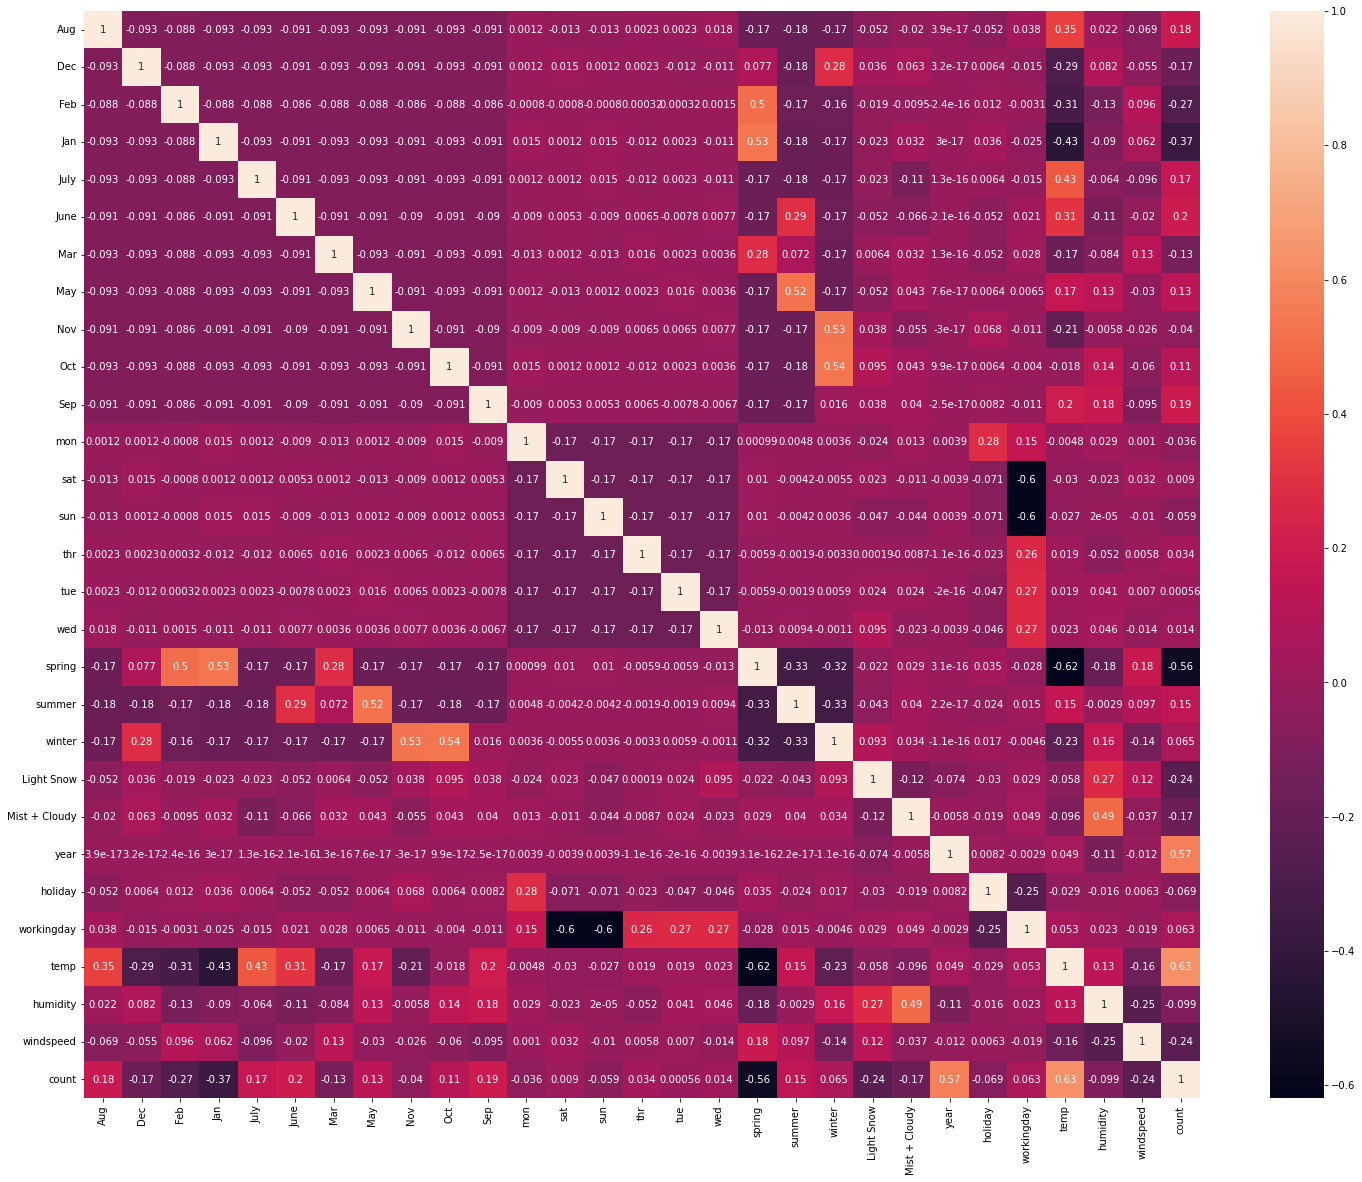

In [41]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

### observation
- Temperature,Summer season,June to october months are in good correlation with the 'count' variable

In [42]:
# Dividing dataset into train and test set
df_train , df_test =train_test_split(df , train_size=0.7,random_state=100)
#df_train.shape
df_train.shape

(510, 29)

In [43]:
#Scaling Variables using Min-Max Scaling
scaler = MinMaxScaler()
vars= ['temp','humidity','windspeed','count']
df_train[vars] = scaler.fit_transform(df_train[vars])

# checking numerical variables
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,winter,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.247059,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.431725,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Linear Model
- using RFE

In [44]:
y_train = df_train.pop('count')
x_train = df_train

In [45]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm, n_features_to_select= 15) 
rfe = rfe.fit(x_train,y_train)

In [46]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thr', False, 12),
 ('tue', False, 8),
 ('wed', False, 14),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [47]:
#columns where RFE support is True
col = x_train.columns[rfe.support_]
col

Index(['July', 'Sep', 'sat', 'sun', 'spring', 'summer', 'winter', 'Light Snow',
       'Mist + Cloudy', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [48]:
#columns where RFE support is False
x_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'mon',
       'thr', 'tue', 'wed'],
      dtype='object')

In [49]:
# new dataframe with RFE selected variables only
x_train_rfe = x_train[col]

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [51]:
# calculating VIF
calculateVIF(x_train_rfe)

,Features,VIF
11,workingday,50.68
2,sat,12.20
3,sun,11.79
4,spring,5.02
12,temp,3.62
6,winter,3.49
10,holiday,2.91
5,summer,2.62
13,humidity,1.91
8,Mist + Cloudy,1.57


In [52]:
#adding Constant
x_train_lm1 = sm.add_constant(x_train_rfe)
#running the Linear model
lr1= sm.OLS(y_train,x_train_lm1).fit() 
# summary of our linear model 
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        14:47:51   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
sat               0.0937      0.012      8.040      0.000       0.071       0.117
sun               0.0406      0.012      3.315      0.001       0.017       0.065
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
year              0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
humidity         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
# Dropping holiday with high p-value
x_train_new = x_train_rfe.drop(['holiday'], axis = 1)

calculateVIF(x_train_new)

,Features,VIF
12,humidity,32.10
11,temp,18.99
10,workingday,18.41
2,sat,4.91
13,windspeed,4.91
4,spring,4.80
3,sun,4.76
6,winter,3.69
5,summer,3.04
8,Mist + Cloudy,2.31


In [54]:
# Add a constant
x_train_lm2 = sm.add_constant(x_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, x_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        14:47:51   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301

In [55]:
#dropping humidity with very high VIF
x_train_new = x_train_new.drop(['humidity'], axis = 1)

calculateVIF(x_train_new)

,Features,VIF
10,workingday,16.19
11,temp,12.74
12,windspeed,4.76
2,sat,4.45
3,sun,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
9,year,2.07
0,July,1.60


In [56]:
# Add a constant
x_train_lm2 = sm.add_constant(x_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, x_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.28e-188
Time:                        14:47:51   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.038      2.624

In [57]:
#dropping workingday with high VIF
x_train_new = x_train_new.drop(['sun'], axis = 1)

calculateVIF(x_train_new)

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
3,spring,2.38
4,summer,2.32
8,year,2.07
5,winter,1.91
2,sat,1.83
0,July,1.58
7,Mist + Cloudy,1.57


In [58]:
# Add a constant
x_train_lm3 = sm.add_constant(x_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, x_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.12e-189
Time:                        14:47:51   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [59]:
#dropping sat high p-value
x_train_new = x_train_new.drop(['windspeed'], axis = 1)

calculateVIF(x_train_new)

,Features,VIF
10,temp,6.03
9,workingday,4.63
8,year,2.07
4,summer,2.06
2,sat,1.81
3,spring,1.78
5,winter,1.73
0,July,1.58
7,Mist + Cloudy,1.57
1,Sep,1.34


In [60]:
# Add a constant
x_train_lm4 = sm.add_constant(x_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, x_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.94e-182
Time:                        14:47:51   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248

In [61]:
#dropping july with hugh p-value in comparison 
x_train_new = x_train_new.drop(['July'], axis = 1)

calculateVIF(x_train_new)

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,year,2.07
1,sat,1.81
3,summer,1.75
2,spring,1.70
4,winter,1.59
6,Mist + Cloudy,1.57
0,Sep,1.23
5,Light Snow,1.07


In [62]:
# Add a constant
x_train_lm5 = sm.add_constant(x_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, x_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.10e-182
Time:                        14:47:51   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964

In [63]:
#Hypotheses testing
lr5.params

const            0.090189
Sep              0.091602
sat              0.064533
spring          -0.064952
summer           0.052659
winter           0.096999
Light Snow      -0.304122
Mist + Cloudy   -0.078644
year             0.233358
workingday       0.056551
temp             0.491382
dtype: float64

- all the coefficients are non-zero meaning we can reject the null hypothesis

## We have our model
- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.833 or 83.3%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.83 or 83%

### Residual Analysis


In [64]:
y_train_pred = lr5.predict(x_train_lm5)


Text(0.5, 0, 'Errors')

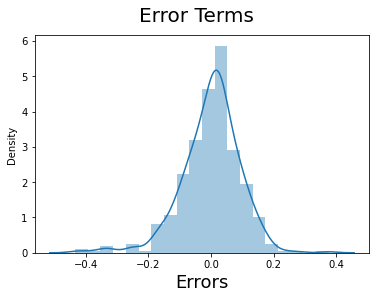

In [65]:
# Plot histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [66]:
vars= ['temp','humidity','windspeed','count']
df_test[vars] = scaler.fit_transform(df_test[vars])

# checking numerical variables
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,winter,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.236364,0.027273,0.318182,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.425817,0.163248,0.466833,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
#diving x_test and y_test from test set
y_test = df_test.pop('count')
x_test = df_test

In [68]:
x_test_new = x_test[x_train_new.columns]

x_test_new = sm.add_constant(x_test_new)

# x_test_new.drop(['July','sat','workingday','humidity','holiday'],axis=1)
x_test_new.columns

Index(['const', 'Sep', 'sat', 'spring', 'summer', 'winter', 'Light Snow',
       'Mist + Cloudy', 'year', 'workingday', 'temp'],
      dtype='object')

In [69]:
y_pred = lr5.predict(x_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

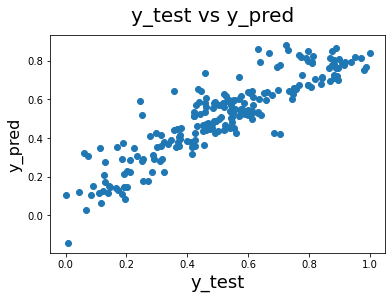

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

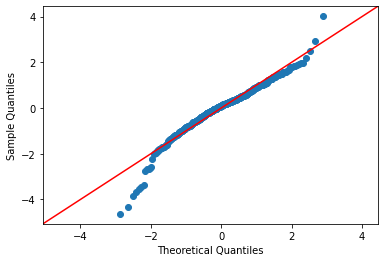

In [71]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [72]:
r2_score(y_test,y_pred)

0.8080237096136125

In [73]:
Adj_r2=1-(1-0.8080237096136125)*(11-1)/(11-1-1)
print(Adj_r2)

0.7866930106817916


### We can see that the equation of our best fitted line is:

count = 0.091 * September + 0.064 * Saturday - 0.064 * Spring + 0.052 * Summer + 0.096 * winter - 0.304 * Light snow - 0.0786 * Mist and cloudy + 0.233 * year + 0.056 * workingday + 0.491 * temp

Analysis Comparison between Train model and Test:
- Train - R^2 : 0.826
- Train - Adjusted R^2 : 0.82
- Test - R^2: 0.808
- Test - Adjusted R^2: 0.786
- Difference in R^2 between train and test: 1.8%
- Difference in adjusted R^2 between Train and test: 4%


Business Goals:
- Temperature could be a prime factor for making decision for the Organisation
- We can see demand for bikes was more in 2019 than 2018
- Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals